# Import Libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

# Load dataset and make dataframe

In [10]:
ds = datasets.load_diabetes()
ds.feature_names
df=pd.DataFrame(data = ds.data, columns= ds.feature_names)
df['target']= ds.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [3]:
# df.to_excel('Data.xlsx',index=False)

In [5]:
df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Visualization

In [8]:
# ncols= 3
# nrows= round(len(df.columns) / ncols)
# fig, axes = plt.subplots(nrows=nrows ,ncols=ncols, figsize= (15, 3*nrows))
# for item in zip(axes.ravel(), df.columns):
#     ax, column= item
#     sns.boxplot(x= df[column], ax= ax, color='skyblue')
# plt.tight_layout()
# plt.show()

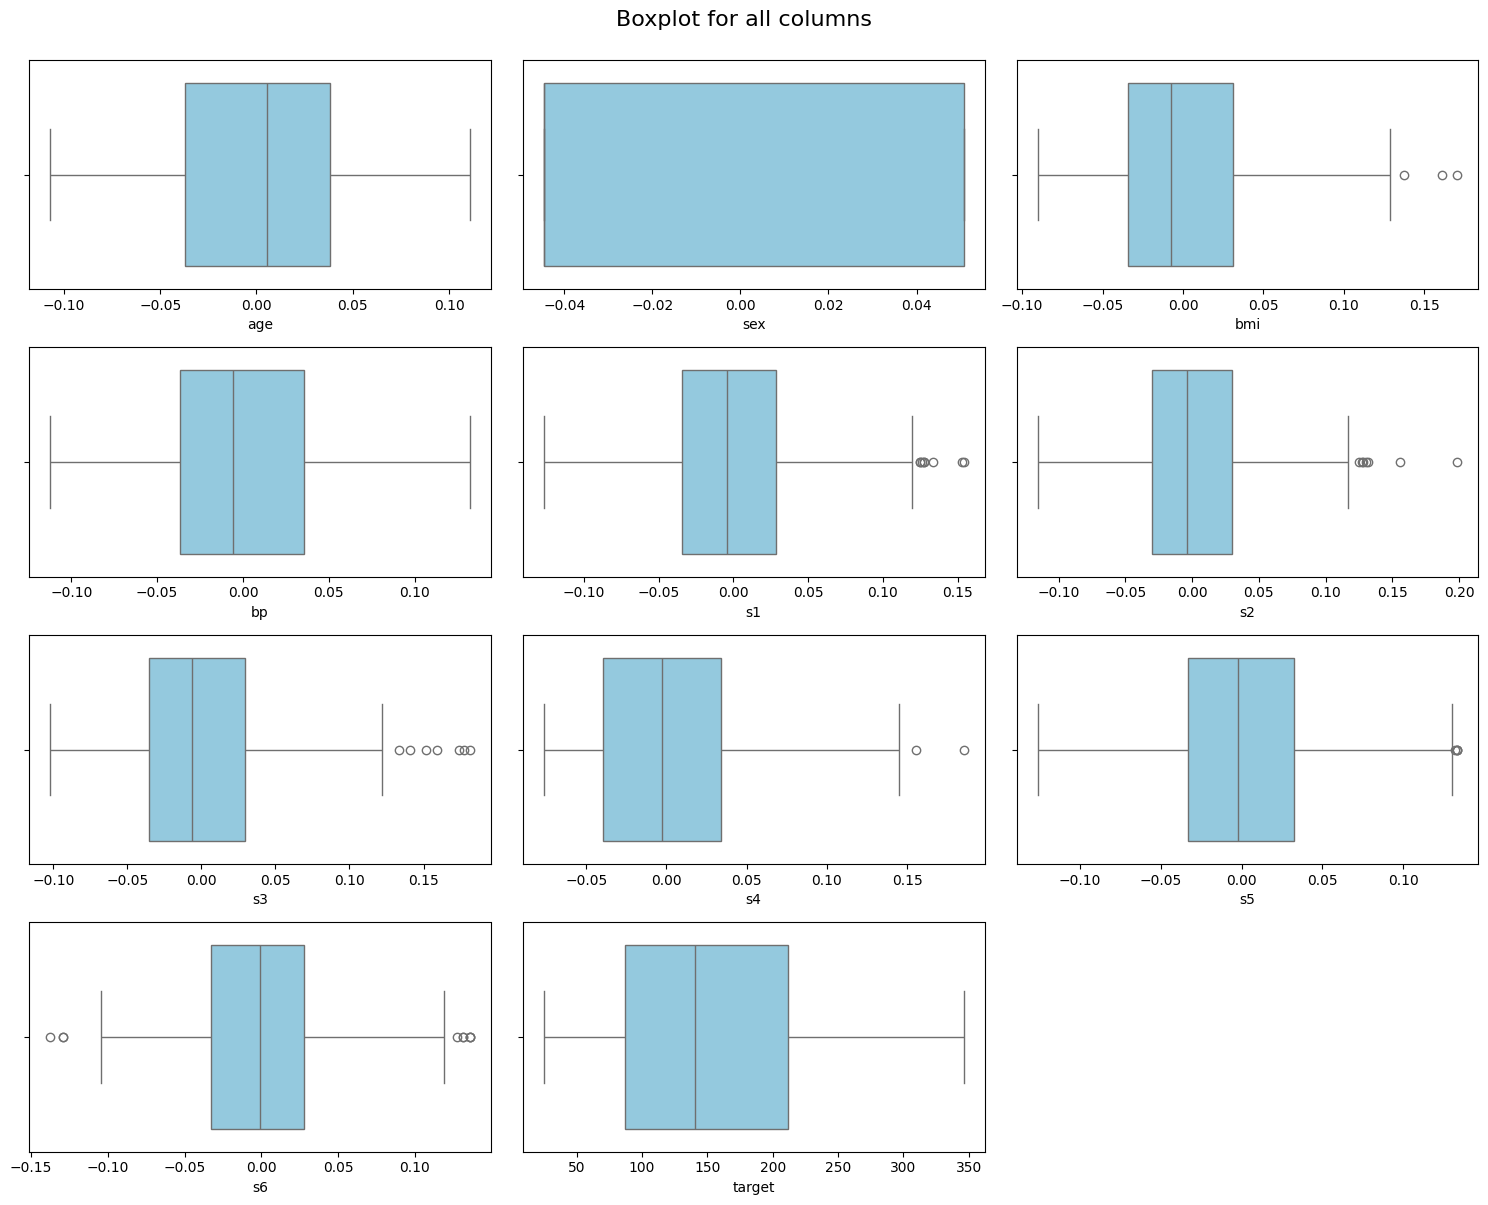

In [ ]:
ncols= 3
nrows= round(len(df.columns) / ncols)
fig, axes = plt.subplots(nrows=nrows ,ncols=ncols, figsize= (15, 3*nrows))
fig.suptitle('Boxplot for all columns', fontsize = 16, y= 1.0)
axes = axes.flatten()
for i, col in enumerate(df.columns):
  sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
  # axes[i].set_xlabel(f'{col}')
  # axes[i].set_ylabel('Count')

# Hide unused subplots
for j in range(i+1, len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

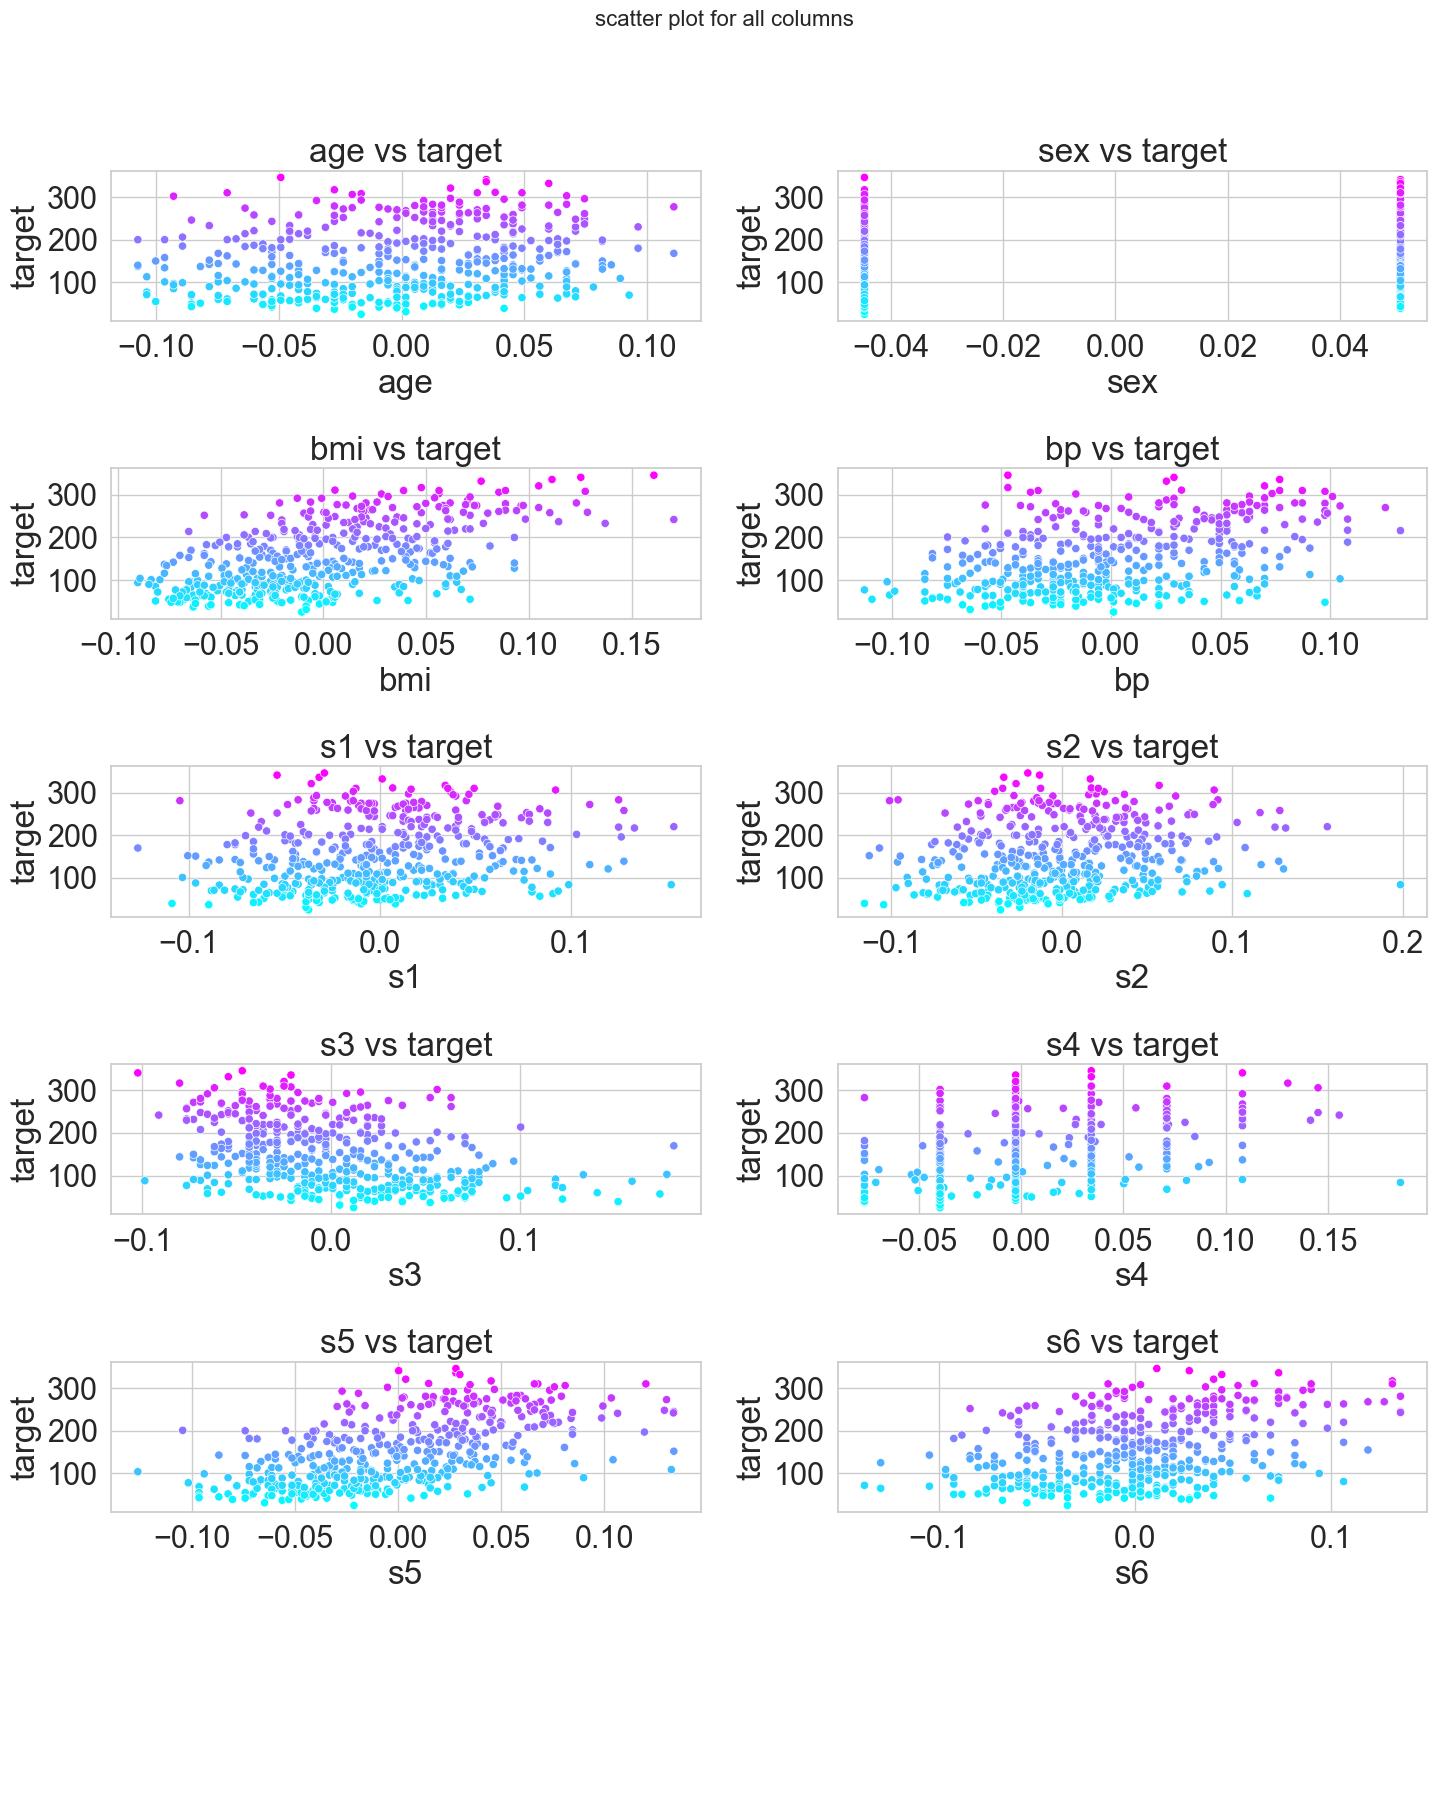

In [35]:
ncols= 2
nrows= round(len(df.columns) / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols= ncols, figsize=(15,3*nrows))
fig.suptitle('scatter plot for all columns', fontsize=16, y=1.02)
axes= axes.flatten()
for i, col in enumerate(df.columns):  # for i , col in enumerate(ds.feature_names): then you can escape if
  if col!= 'target':
    sns.scatterplot(x= df[col], y=df['target'], ax=axes[i], hue= df['target'], palette= 'cool', legend= False)
    axes[i].set_title(f'{col} vs target')

for j in range(i,len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

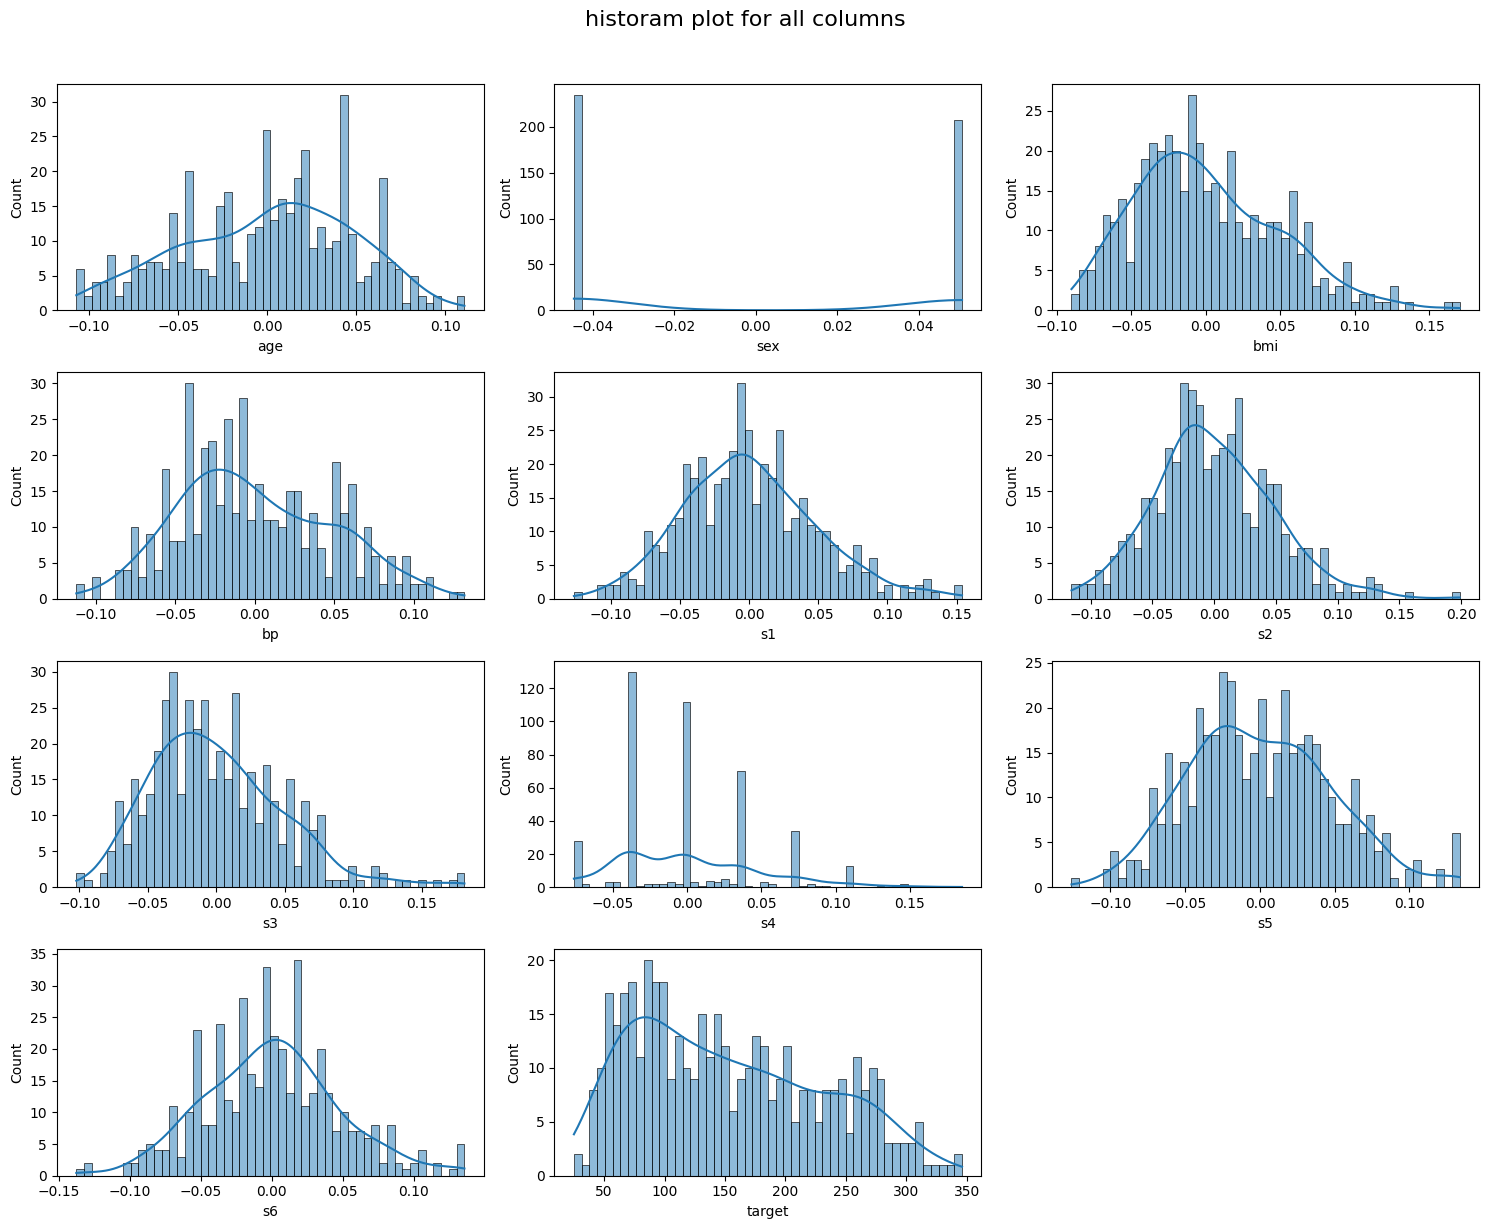

In [ ]:
ncols=3
nrows= round(len(df.columns) / ncols)
fig ,axes= plt.subplots(nrows= nrows, ncols=ncols, figsize= (15, 3*nrows))
fig.suptitle('historam plot for all columns', fontsize= 16, y=1.02)
axes= axes.flatten()
for i, col in enumerate(df.columns):
  sns.histplot(df[col], bins=50, edgecolor='black', kde= True, ax= axes[i])

for j in range(i+1 , len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

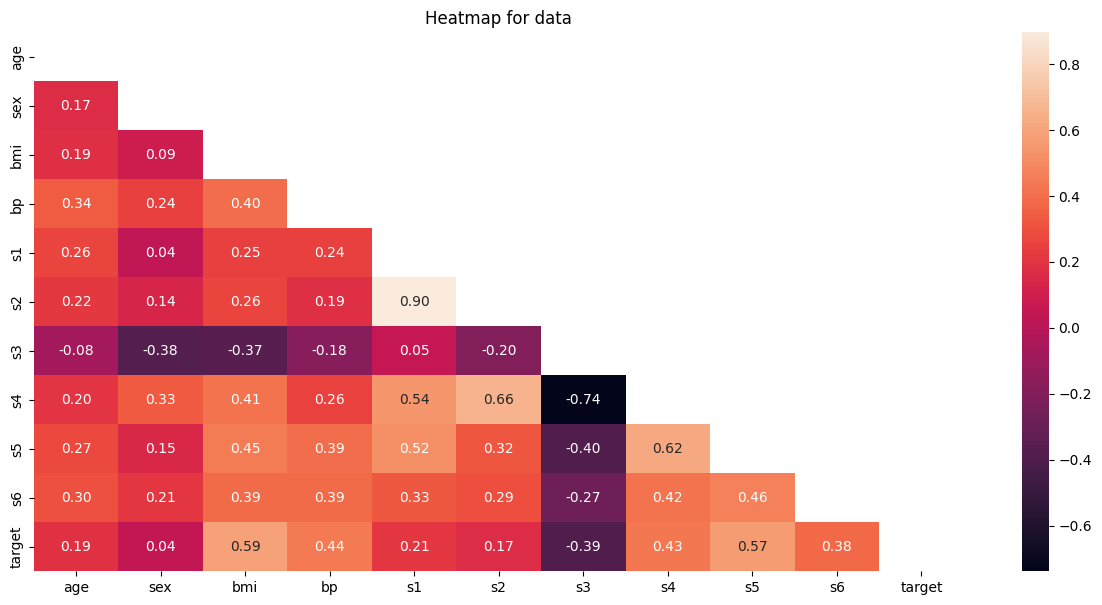

In [ ]:
# triangle heatmap
# fig=plt.subplots(figsize = (15,7))
# corr=df.corr(numeric_only=True)
# mask= np.triu(np.ones_like(corr, dtype= bool))   # mask= np.triu(corr)
# sns.heatmap(corr, annot = True, square= False, fmt = '.2f', mask= mask)
# plt.title('Heatmap for data')
# plt.show()

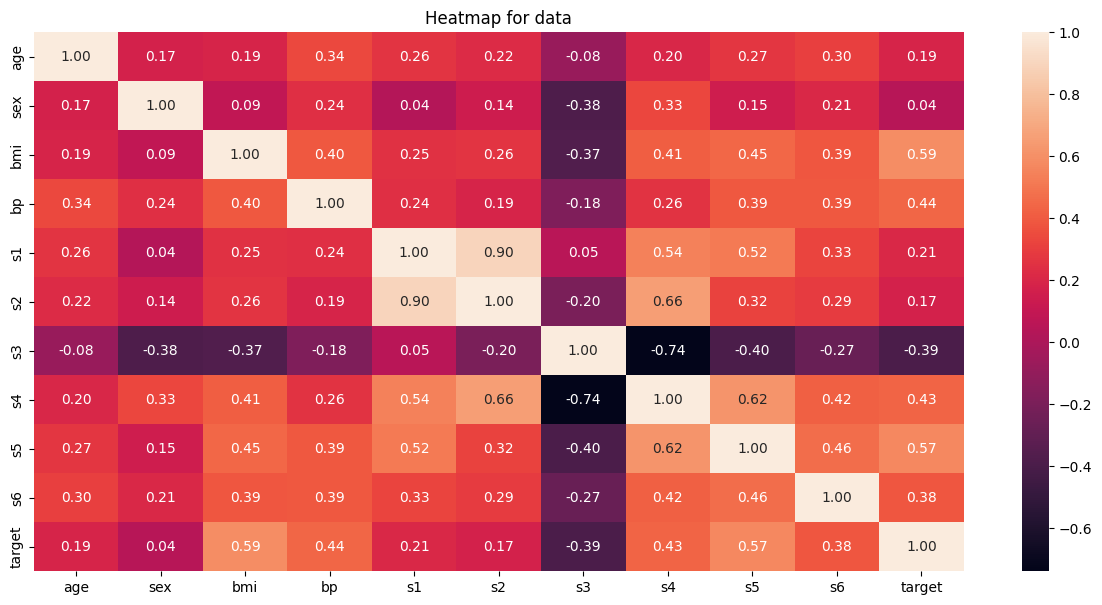

In [ ]:
fig=plt.subplots(figsize = (15,7))
sns.heatmap(df.corr(numeric_only= True), annot = True, square= False, fmt = '.2f')
plt.title('Heatmap for data')
plt.show()

# Linear_Regression class - single variable - without data spliting

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [11]:
# Generate data for LinearRegression/single (bmi) variable
# X= np.array([df['bmi']]).reshape(-1,1)
# y= np.array(df['target'])

X= df[['bmi']]
y= df['target']

# Generate Model
model= LinearRegression()
model.fit(X,y)
print(f"Equation is: y = {model.intercept_:.4f} + {(model.coef_)[0]:.4f} * BMI")

# Evaluate Model
y_pred= model.predict(X)
mse= mean_squared_error(y, y_pred)
r2= r2_score(y, y_pred)
print(f" MSE = {mse}")
print(f" R2 = {r2}")


Equation is: y = 152.1335 + 949.4353 * BMI
 MSE = 3890.456585461273
 R2 = 0.3439237602253802


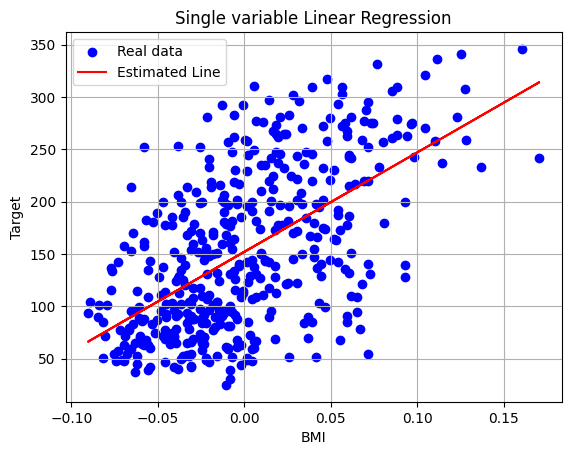

In [ ]:
# Plot model
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color= 'red')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Single variable Linear Regression')
plt.legend(['Real data', 'Estimated Line'])
plt.grid(True)
plt.show()

# Linear_Regression class - single variable - with data spliting

For X= bmi if Equation is y= mx + b => m = 885.4222 and b = 151.1006


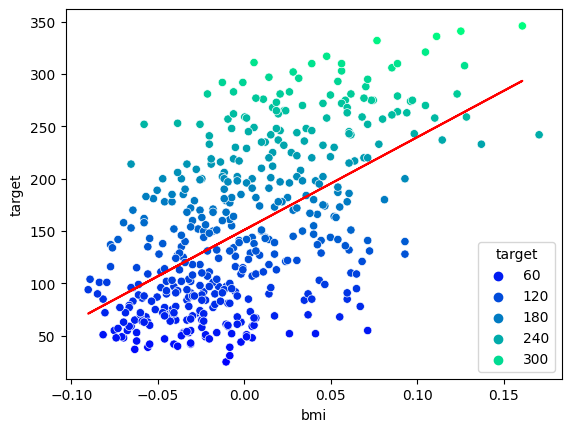

In [11]:
X= df[['bmi']]
y= df['target']

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=11 , train_size= 0.7)
model= LinearRegression()
model.fit(X_train, y_train)
print(f'For X= bmi if Equation is y= mx + b => m = {(model.coef_)[0]:.4f} and b = {model.intercept_:.4f}')
y_pred= model.predict(X_test)
# for p, t in zip(y_pred[::5], y_test[::5]):
#     print(f'Prediction: {p:.4f} => Except: {t:.4f}')
axes= sns.scatterplot(data= df, x='bmi', y= 'target', hue= 'target', palette= 'winter', legend=True)# ['Real data', 'Estimated Line'])
line= plt.plot(X_test, y_pred, color= 'red')

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
best_score= -1
best_col= None
for col in ds.feature_names:
    X= df[col].values.reshape(-1,1)
    y= df['target']
    X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=11 , train_size= 0.8)
    model= LinearRegression()
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    #r2_score= r2_score(y_test, y_pred)
    r2_score= model.score(X_test, y_test)
    print(f'if X= {col} Equation is y= mx + b => m = {(model.coef_)[0]:.4f} and b = {model.intercept_:.4f}\nMSE= {mean_squared_error(y_test, y_pred):.4f} r2_score= {r2_score}')
    if r2_score > best_score:
        best_col= col
        best_score= r2_score
        
print(f'best col for sigle variable LinearRegression= ***{best_col}***, best score= ***{best_score:.4f}***')

if X= age Equation is y= mx + b => m = 217.1774 and b = 151.6528
MSE= 7084.5097 r2_score= 0.06756035886368039
if X= sex Equation is y= mx + b => m = -12.8985 and b = 151.6537
MSE= 7627.3857 r2_score= -0.003891179574224246
if X= bmi Equation is y= mx + b => m = 898.7581 and b = 152.1164
MSE= 4468.7756 r2_score= 0.4118345919808919
if X= bp Equation is y= mx + b => m = 663.2170 and b = 152.8453
MSE= 5687.1676 r2_score= 0.25147389000583265
if X= s1 Equation is y= mx + b => m = 303.0344 and b = 151.8282
MSE= 7166.8359 r2_score= 0.05672485233069258
if X= s2 Equation is y= mx + b => m = 229.7724 and b = 151.5819
MSE= 7247.2267 r2_score= 0.046144083567240646
if X= s3 Equation is y= mx + b => m = -553.5176 and b = 151.0322
MSE= 5768.9591 r2_score= 0.24070875677481285
if X= s4 Equation is y= mx + b => m = 599.7114 and b = 151.3614
MSE= 5513.9904 r2_score= 0.27426689475992705
if X= s5 Equation is y= mx + b => m = 867.4649 and b = 152.2047
MSE= 4719.1723 r2_score= 0.3788782075712682
if X= s6 Equat

# Multiple Linear Regression

In [28]:
# pd.set_option('precision', 4)
# pd.set_option('max_columns', 10)
# pd.set_option('display.width', None)


In [12]:

# load datasetds= datasets.load_diabetes()
df= pd.DataFrame(data= ds.data, columns=ds.feature_names)
df['target']= pd.Series(ds.target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [30]:
X= df.drop(['target'], axis=1) # X= ds.data
y= df['target'] # y= ds.target
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 11, train_size=.7)

model= LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
r2= model.score(X_test, y_test)# r2= r2_score(y_test, y_pred)
print(f'MSE= {mse:.4f} r2_score= {r2}')
print(f'Eguation is: y(target) = ({(model.coef_)[0]:.4f})age + ({(model.coef_)[1]:.4f})sex +({(model.coef_)[2]:.4f})bmi+' + 
        f'({(model.coef_)[3]:.4f})bp +({(model.coef_)[4]:.4f})s1 +({(model.coef_)[5]:.4f})s2 +({(model.coef_)[6]:.4f})s3 +'+
        f'({(model.coef_)[7]:.4f})s4 +({(model.coef_)[8]:.4f})s5 +({(model.coef_)[9]:.4f})s6')
#model.score(X_test, y_test) => show r2_score

MSE= 3229.6713 r2_score= 0.5511581682888664
Eguation is: y(target) = (-58.0281)age + (-243.2467)sex +(500.5149)bmi+(321.0916)bp +(-316.2268)s1 +(104.8764)s2 +(-116.8617)s3 +(43.4924)s4 +(585.5844)s5 +(56.6183)s6


## Visualizing the Expected vs. Predicted Prices 

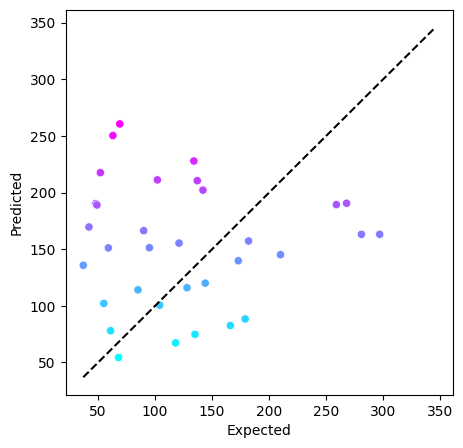

In [32]:
df_vis=pd.DataFrame()
df_vis['Expected']= pd.Series(y_test)
df_vis['Predicted']= pd.Series(y_pred)
figure= plt.figure(figsize=(5,5))
axes= sns.scatterplot(data= df_vis, x= 'Expected', y= 'Predicted', hue= 'Predicted', legend= False, palette= 'cool')
start= min(df_vis['Expected'].min(), df_vis['Predicted'].min())
end= max(df_vis['Expected'].max(), df_vis['Predicted'].max())
line= plt.plot([start, end], [start, end], 'k--')

# Normal Equation - single variable

In [ ]:
# Normal equation:  Ax=b,  AT.Ax=AT.b.

def normal_equation (X,y):
  return np.linalg.inv(X.T @ X) @ X.T @ y

def mean_squared_error (y_true, y_predict):
  return np.mean((y_true - y_predict) ** 2)

def r2_score(y_true, y_pred):
  SS_Residual= np.sum((y_true - y_pred) ** 2)
  SS_Total= np.sum((y_true - np.mean(y_true)) ** 2)
  return 1 - (SS_Residual / SS_Total)

# Generate data for LinearRegression/single (bmi) variable
X= np.array([df['bmi']]).reshape(-1,1)
y= np.array(df['target'])

theta= normal_equation(X,y)

y_pred=np.dot(X,theta)

mse= mean_squared_error(y, y_pred)
r2= r2_score(y, y_pred)
print(f" MSE = {mse}")
print(f" R2 = {r2}")

# Plot model
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color= 'red')
plt.xlabel('BMI')
plt.ylabel('target')
plt.title('Single variable Normal Equation')
plt.legend(['Real data', 'Estimated Line'])
plt.grid(True)
plt.show()

# Gradian descent - single variable

 MSE = 29073.55929085859
 R2 = -3.902887627044268


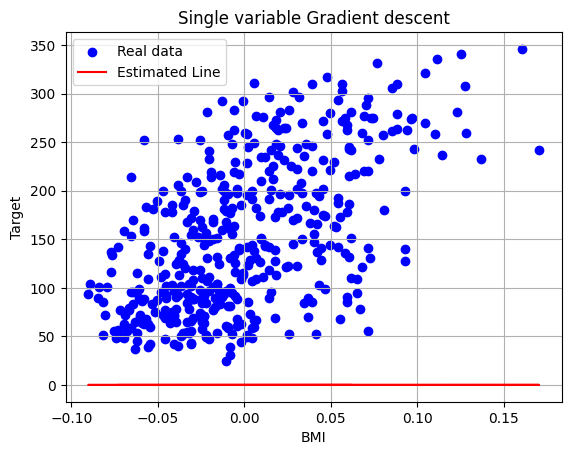

In [ ]:

def hypothesis (theta,X):
  return np.dot(X, theta)

def cost_fuction(theta, X, y):
  m= len(y)
  J=np.sum((hypothesis(theta,X) - y) ** 2) / (2 * m)
  return J

def Gradient_descent(theta, X, y, learning_rate, iterations):
  m=len(y)
  cost_history=np.zeros(iterations)
  for i in range(iterations):
    gradient= np.dot(X.T,(hypothesis(theta,X) - y)) / m
    theta= theta - (learning_rate * gradient)
    cost_history[i]= cost_fuction(theta, X, y)
  return theta, cost_history

def mean_squared_error (y_true, y_predict):
  return np.mean((y_true - y_predict) ** 2)

def r2_score(y_true, y_pred):
  SS_Residual= np.sum((y_true - y_pred) ** 2)
  SS_Total= np.sum((y_true - np.mean(y_true)) ** 2)
  return 1 - (SS_Residual / SS_Total)

# Generate data for LinearRegression/single (bmi) variable
# X= np.array([df['bmi']]).reshape(-1,1)
# y= np.array(df['target'])
X= df[['bmi']]
y=df['target']

initia_theta= np.zeros(X.shape[1])
learning_rate= .0001
iterations= 1000

theta, cost_history = Gradient_descent(initia_theta, X, y, learning_rate, iterations)


y_pred=hypothesis(theta, X)

mse= mean_squared_error(y, y_pred)
r2= r2_score(y, y_pred)

print(f" MSE = {mse}")
print(f" R2 = {r2}")

# Plot model
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color= 'red')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Single variable Gradient descent')
plt.legend(['Real data', 'Estimated Line'])
plt.grid(True)
plt.show()

# Linear_Regression class - two variable - without spliting

Equation is: y = 152.1335 + 675.0714 * BMI + 614.9499 * s5
 MSE = 3205.1900768248533
 R2 = 0.45948527963926633


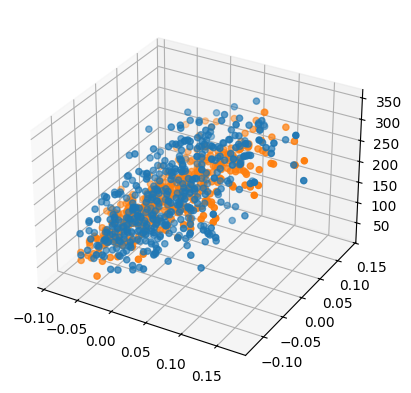

In [ ]:
X= df[['bmi', 's5']]
y= df['target']

# Generate Model
model= LinearRegression()
model.fit(X,y)
print(f"Equation is: y = {model.intercept_:.4f} + {(model.coef_)[0]:.4f} * BMI + {(model.coef_)[1]:.4f} * s5")

# Evaluate Model
y_pred= model.predict(X)
mse= mean_squared_error(y, y_pred)
r2= r2_score(y, y_pred)
print(f" MSE = {mse}")
print(f" R2 = {r2}")

# Drew plot
fig= plt.figure()
ax= fig.add_subplot(111, projection= '3d')
ax.scatter(X['bmi'], X['s5'], y)
ax.scatter(X['bmi'], X['s5'], y_pred)
plt.show()

# Linear_Regression class - multi variable - with spliting

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X= ds.data
y= ds.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
model= LinearRegression()
model.fit(X_train, y_train)

print(f"Equation is: y = {model.intercept_:.4f} + {(model.coef_)[0]:.4f} * AGE + {(model.coef_)[1]:.4f} * SEX + {(model.coef_)[2]:.4f} * MBI + {(model.coef_)[3]:.4f} * bp + {(model.coef_)[4]:.4f} * S1 + {(model.coef_)[5]:.4f} * S2 + {(model.coef_)[6]:.4f} * S3 + {(model.coef_)[7]:.4f} * S4 + {(model.coef_)[8]:.4f} * S5 + {(model.coef_)[9]:.4f} * S6")

y_pred= model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(f" MSE = {mse}")
print(f" R2 = {r2}")

Equation is: y = 140.4908 + -83.3814 * AGE + -139.3591 * SEX + 623.5714 * MBI + 529.9256 * bp + 70.6580 * S1 + -82.2324 * S2 + -162.3035 * S3 + -76.3205 * S4 + 277.6067 * S5 + -49.0100 * S6
 MSE = 3371.169509258725
 R2 = 0.43511654150099066


# Polynomial Regresion

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

X= ds.data
y= ds.target

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.8 , random_state= 42)

model = LinearRegression()
poly= PolynomialFeatures(2)
# poly= PolynomialFeatures(include_bias= False)
X_train_Poly= poly.fit_transform(X_train)
X_test_poly= poly.fit_transform(X_test)
model.fit(X_train_Poly, y_train)
y_pred=model.predict(X_test_poly)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f" MSE = {mse}")
print(f" R2 = {r2}")

 MSE = 3096.028307344255
 R2 = 0.4156399336408033


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

X= ds.data
y= ds.target

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.75 , random_state= 42)

model = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('standard_scaler', StandardScaler()),
    ('ridge_regression', Ridge())
])


model.fit(X_train, y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f" MSE = {mse}")
print(f" R2 = {r2}")

 MSE = 3003.8474545153035
 R2 = 0.4567783068676289


# Ridge, Lasso Regression and ElasticNet

In [ ]:
X= df.drop('target', axis=1)
y= df[['target']]

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.2, random_state=42)

model= Ridge(alpha=0.2)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 3629.98677655117
R2: 0.3917483297673817


In [ ]:
X= df.drop('target', axis=1)
y= df[['target']]

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.2, random_state=42)

model= Lasso(alpha=0.1)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 3440.996872675872
R2: 0.42341605523454406


In [ ]:
X= df.drop('target', axis=1)
y= df[['target']]

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.2, random_state=1)

model= ElasticNet(alpha=0.0001, l1_ratio=0.1)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 3586.6682169879996
R2: 0.3772621579451989


# Best Hyperparameter

In [ ]:
!pip install scikit_optimize

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from skopt import BayesSearchCV

X= df.drop('target', axis=1)
y= df[['target']]
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.2, random_state=1)
model= ElasticNet()
params= {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
         }

# # Grid search
# grid_search= GridSearchCV(estimator= model, param_grid= params, scoring='r2', cv=6)
# grid_search.fit(X_train, y_train)
# print(f'Best for GridSearch: {grid_search.best_estimator_}')
# print(f'Best score for GridSearch: {grid_search.best_score_}')

# # Random search
# random_search= RandomizedSearchCV(estimator= model, param_distributions= params, n_iter= 20, scoring='r2', cv=6, random_state= 42)
# random_search.fit(X_train, y_train)
# print(f'Best for RandomSearch: {random_search.best_estimator_}')
# print(f'Best score for RandomSearch: {random_search.best_score_}')

#Bayesian optimization
opt= BayesSearchCV(estimator= model, search_spaces= params, n_iter= 20, scoring= 'r2', cv= 6)
opt.fit(X_train, y_train)
print(f'Best for BayesSearch: {opt.best_estimator_}')
print(f'Best score for BayesSearch: {opt.best_score_}')

Best for BayesSearch: ElasticNet(alpha=0.0001, l1_ratio=0.1)
Best score for BayesSearch: 0.5301571734546519


# Modeling _ DecisionTreeRegressor

In [9]:
X= ds.data
y= ds.target
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.7, random_state= 42)

In [12]:
model= DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f'R2_score: {r2:.4f}')

MSE: 5691.3308
R2_score: -0.0543


# Choosing the best model

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [38]:
X= df.drop(['target'], axis=1) # X= ds.data
y= df['target'] # y= ds.target

estimators= {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor()
}
for estimator_name, estimator_object in estimators.items():
    kfold= KFold(n_splits= 10, random_state= 11, shuffle= True)
    scores= cross_val_score(estimator= estimator_object, X= X, y= y, cv=kfold, scoring= 'r2')
    print(f'{estimator_name:>16}: ' + f'{scores.mean():.4f}')

LinearRegression: 0.4747
           Ridge: 0.4213
           Lasso: 0.3385
      ElasticNet: -0.0021
DecisionTreeRegressor: -0.3060
